In [1]:
import pandas as pd
import numpy as np

In [20]:
train = pd.read_csv('Data/train_bigmartsale.csv')
test = pd.read_csv('Data/test_bigmartsale.csv')

In [7]:
train.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales source  
0  Supermarket Type1          3735.1380  train  
1  Supermarket Type2           443.4228  train  
2  Supermarket Type1          2097.2700  train  
3      Grocery Store           732.3800  train  
4  Supermarket Type1           994.7052  train

In [8]:
test.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  \
0           FDW58       20.750          Low Fat         0.007565  Snack Foods   
1           FDW14        8.300              reg         0.038428        Dairy   
2           NCN55       14.600          Low Fat         0.099575       Others   
3           FDQ58        7.315          Low Fat         0.015388  Snack Foods   
4           FDY38          NaN          Regular         0.118599        Dairy   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  107.8622            OUT049                       1999      Medium   
1   87.3198            OUT017                       2007         NaN   
2  241.7538            OUT010                       1998         NaN   
3  155.0340            OUT017                       2007         NaN   
4  234.2300            OUT027                       1985      Medium   

  Outlet_Location_Type        Outlet_Type source  
0               Tier 1  Supermarket Type1   test  
1               Tier 2  Supermarket Type1   test  
2               Tier 3      Grocery Store   test  
3               Tier 2  Supermarket Type1   test  
4               Tier 3  Supermarket Type3   test

In [9]:
len(train)

8523

In [10]:
len(test)

5681

In [21]:
train['source'] = 'train'
test['source'] = 'test'

In [22]:
data = pd.concat([train, test], ignore_index=True)

In [23]:
train.shape

(8523, 13)

In [24]:
test.shape

(5681, 12)

In [26]:
data.shape

(14204, 13)

In [27]:
data

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0               FDA15         9.30          Low Fat         0.016047   
1               DRC01         5.92          Regular         0.019278   
2               FDN15        17.50          Low Fat         0.016760   
3               FDX07        19.20          Regular         0.000000   
4               NCD19         8.93          Low Fat         0.000000   
...               ...          ...              ...              ...   
14199           FDB58        10.50          Regular         0.013496   
14200           FDD47         7.60          Regular         0.142991   
14201           NCO17        10.00          Low Fat         0.073529   
14202           FDJ26        15.30          Regular         0.000000   
14203           FDU37         9.50          Regular         0.104720   

                   Item_Type  Item_MRP Outlet_Identifier  \
0                      Dairy  249.8092            OUT049   
1                Soft Drinks   48.2692            OUT018   
2                       Meat  141.6180            OUT049   
3      Fruits and Vegetables  182.0950            OUT010   
4                  Household   53.8614            OUT013   
...                      ...       ...               ...   
14199            Snack Foods  141.3154            OUT046   
14200          Starchy Foods  169.1448            OUT018   
14201     Health and Hygiene  118.7440            OUT045   
14202                 Canned  214.6218            OUT017   
14203                 Canned   79.7960            OUT045   

       Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                           1999      Medium               Tier 1   
1                           2009      Medium               Tier 3   
2                           1999      Medium               Tier 1   
3                           1998         NaN               Tier 3   
4                           1987        High               Tier 3   
...                          ...         ...                  ...   
14199                       1997       Small               Tier 1   
14200                       2009      Medium               Tier 3   
14201                       2002         NaN               Tier 2   
14202                       2007         NaN               Tier 2   
14203                       2002         NaN               Tier 2   

             Outlet_Type  Item_Outlet_Sales source  
0      Supermarket Type1          3735.1380  train  
1      Supermarket Type2           443.4228  train  
2      Supermarket Type1          2097.2700  train  
3          Grocery Store           732.3800  train  
4      Supermarket Type1           994.7052  train  
...                  ...                ...    ...  
14199  Supermarket Type1                NaN   test  
14200  Supermarket Type2                NaN   test  
14201  Supermarket Type1                NaN   test  
14202  Supermarket Type1                NaN   test  
14203  Supermarket Type1                NaN   test  

[14204 rows x 13 columns]

In [29]:
data.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [30]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [31]:
# look at some basic statistics for numerical variables
data.describe()

Item_Weight  Item_Visibility      Item_MRP  Outlet_Establishment_Year  \
count  11765.000000     14204.000000  14204.000000               14204.000000   
mean      12.792854         0.065953    141.004977                1997.830681   
std        4.652502         0.051459     62.086938                   8.371664   
min        4.555000         0.000000     31.290000                1985.000000   
25%        8.710000         0.027036     94.012000                1987.000000   
50%       12.600000         0.054021    142.247000                1999.000000   
75%       16.750000         0.094037    185.855600                2004.000000   
max       21.350000         0.328391    266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

In [33]:
#number of unique values in each of them
data.apply(lambda x: x.nunique())

Item_Identifier               1559
Item_Weight                    415
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      3
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3493
source                           2
dtype: int64

In [36]:
# Filter categorical variables
categorical_columns = [x for x in data.dtypes.index if data.dtypes[x] == 'object']

In [38]:
# Exclude ID and source
categorical_columns = [x for x in categorical_column if x not in ['Item_Identifier', 'Outlet_Identifier', 'source']]

In [39]:
categorical_columns

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [44]:
for col in categorical_columns:
    print('\nFrequency of Categories for variable %s'%col)
    print(data[col].value_counts())


Frequency of Categories for variable Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Frequency of Categories for variable Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Frequency of Categories for variable Outlet_Size
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

Frequency of Categories for variable Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int6

In [55]:
# Determine the average weight per item
item_avg_weight = data.pivot_table(values='Item_Weight', index='Item_Identifier')

In [56]:
item_avg_weight

Item_Weight
Item_Identifier             
DRA12                 11.600
DRA24                 19.350
DRA59                  8.270
DRB01                  7.390
DRB13                  6.115
...                      ...
NCZ30                  6.590
NCZ41                 19.850
NCZ42                 10.500
NCZ53                  9.600
NCZ54                 14.650

[1559 rows x 1 columns]

In [74]:
data[data['Item_Identifier'] =='FDP10'].mean()

Item_Weight                    19.000000
Item_Visibility                 0.146434
Item_MRP                      106.052200
Outlet_Establishment_Year    1997.300000
Item_Outlet_Sales            1769.411057
dtype: float64

In [70]:
miss_bool = data['Item_Weight'].isnull()

In [71]:
print('Original #missing: %d'%sum(miss_bool))

Original #missing: 2439


In [100]:
data.loc[miss_bool, 'Item_Weight'] = data.loc[miss_bool, 'Item_Identifier'].apply(lambda x: item_avg_weight.loc[x])

In [109]:
print('Final #missing: %d'%sum(data['Item_Weight'].isnull()))

Final #missing: 0


In [110]:
# Import mode function
from scipy.stats import mode

In [133]:
# Determine the mode for each
outlet_size_mode =  data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: mode(x).mode[0]))

In [119]:
data[['Outlet_Type', 'Outlet_Size']].nunique()

Outlet_Type    4
Outlet_Size    3
dtype: int64

In [132]:
data.loc[data['Outlet_Type'] =='Supermarket Type3']['Outlet_Size'].value_counts()

In [137]:
print('Mode for each Outlet_Type:')

Mode for each Outlet_Type:


In [139]:
outlet_size_mode

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium

In [141]:
miss_bool= data['Outlet_Size'].isnull()

In [146]:
print('Original #missing: %d'%sum(miss_bool))

Original #missing: 4016


In [154]:
data.loc[miss_bool,'Outlet_Size'] = data.loc[miss_bool,'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

In [156]:
print('Final #missing: %d'%sum(data['Outlet_Size'].isnull()))

Final #missing: 0


In [157]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [158]:
data.pivot_table(values='Item_Outlet_Sales', index='Outlet_Type')

Item_Outlet_Sales
Outlet_Type                         
Grocery Store             339.828500
Supermarket Type1        2316.181148
Supermarket Type2        1995.498739
Supermarket Type3        3694.038558

In [161]:
visibility_avg = data.pivot_table(values='Item_Visibility', index='Item_Identifier')

In [172]:
visibility_avg

Item_Visibility
Item_Identifier                 
DRA12                   0.034938
DRA24                   0.045646
DRA59                   0.133384
DRB01                   0.079736
DRB13                   0.006799
...                          ...
NCZ30                   0.027302
NCZ41                   0.056396
NCZ42                   0.011015
NCZ53                   0.026330
NCZ54                   0.081345

[1559 rows x 1 columns]

In [164]:
miss_bool = (data['Item_Visibility'] == 0)

In [165]:
print('Number of 0 values initially: %d'%sum(miss_bool))

Number of 0 values initially: 879


In [169]:
data.loc[miss_bool, 'Item_Visibility'] = data.loc[miss_bool, 'Item_Identifier'].apply(lambda x: visibility_avg.loc[x])

In [171]:
print('Number of 0 values after modification: %d'%sum(data['Item_Visibility'].isnull()))

Number of 0 values after modification: 0


In [174]:
data['Item_Visibility_MeanRatio'] = data.apply(lambda x: x['Item_Visibility']/visibility_avg.loc[x['Item_Identifier']], axis=1)

In [176]:
data['Item_Visibility_MeanRatio'].describe()

count    14204.000000
mean         1.061884
std          0.235907
min          0.844563
25%          0.925131
50%          0.999070
75%          1.042007
max          3.010094
Name: Item_Visibility_MeanRatio, dtype: float64

In [185]:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])

In [187]:
data['Item_Type_Combined']

0        FD
1        DR
2        FD
3        FD
4        NC
         ..
14199    FD
14200    FD
14201    NC
14202    FD
14203    FD
Name: Item_Type_Combined, Length: 14204, dtype: object

In [186]:
data['Item_Type_Combined'].unique()

array(['FD', 'DR', 'NC'], dtype=object)

In [188]:
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD': 'Food',
                               'NC':'Non-Consumable',
                               'DR':'Drink'})

In [190]:
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drink              1317
Name: Item_Type_Combined, dtype: int64

In [192]:
data['Outlet_Year']= 2013 - data['Outlet_Establishment_Year']

In [194]:
data['Outlet_Year'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Year, dtype: float64

In [196]:
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [198]:
data['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [199]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat',
                                 'reg':'Regular',
                                 'low fat':'Low Fat'})

In [200]:
data['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [207]:
data.loc[data['Item_Type_Combined']=='Non-Consumable', 'Item_Fat_Content']="Non-Edible"

In [208]:
data['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [209]:
data['Outlet_Identifier']

0        OUT049
1        OUT018
2        OUT049
3        OUT010
4        OUT013
          ...  
14199    OUT046
14200    OUT018
14201    OUT045
14202    OUT017
14203    OUT045
Name: Outlet_Identifier, Length: 14204, dtype: object

In [213]:
[x for x in data.dtypes.index if data.dtypes[x] =='object']

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'source',
 'Item_Type_Combined']

In [210]:
from sklearn.preprocessing import LabelEncoder

In [214]:
le = LabelEncoder()

In [218]:
data['Outlet_Identifier'].nunique()

10

In [219]:
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])

In [220]:
var_mod = ['Item_Fat_Content', 'Outlet_Location_Type', 'Outlet_Size', 'Item_Type_Combined', 'Outlet_Type', 'Outlet']

In [221]:
le =LabelEncoder()

In [223]:
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [224]:
data

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0               FDA15         9.30                 0         0.016047   
1               DRC01         5.92                 2         0.019278   
2               FDN15        17.50                 0         0.016760   
3               FDX07        19.20                 2         0.017834   
4               NCD19         8.93                 1         0.009780   
...               ...          ...               ...              ...   
14199           FDB58        10.50                 2         0.013496   
14200           FDD47         7.60                 2         0.142991   
14201           NCO17        10.00                 1         0.073529   
14202           FDJ26        15.30                 2         0.088380   
14203           FDU37         9.50                 2         0.104720   

                   Item_Type  Item_MRP Outlet_Identifier  \
0                      Dairy  249.8092            OUT049   
1                Soft Drinks   48.2692            OUT018   
2                       Meat  141.6180            OUT049   
3      Fruits and Vegetables  182.0950            OUT010   
4                  Household   53.8614            OUT013   
...                      ...       ...               ...   
14199            Snack Foods  141.3154            OUT046   
14200          Starchy Foods  169.1448            OUT018   
14201     Health and Hygiene  118.7440            OUT045   
14202                 Canned  214.6218            OUT017   
14203                 Canned   79.7960            OUT045   

       Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  \
0                           1999            1                     0   
1                           2009            1                     2   
2                           1999            1                     0   
3                           1998            2                     2   
4                           1987            0                     2   
...                          ...          ...                   ...   
14199                       1997            2                     0   
14200                       2009            1                     2   
14201                       2002            2                     1   
14202                       2007            2                     1   
14203                       2002            2                     1   

       Outlet_Type  Item_Outlet_Sales source  Item_Visibility_MeanRatio  \
0                1          3735.1380  train                   0.931078   
1                2           443.4228  train                   0.933420   
2                1          2097.2700  train                   0.960069   
3                0           732.3800  train                   1.000000   
4                1           994.7052  train                   1.000000   
...            ...                ...    ...                        ...   
14199            1                NaN   test                   0.874729   
14200            2                NaN   test                   0.878292   
14201            1                NaN   test                   1.162245   
14202            1                NaN   test                   1.000000   
14203            1                NaN   test                   1.029678   

       Item_Type_Combined  Outlet_Year  Outlet  
0                       1           14       9  
1                       0            4       3  
2                       1           14       9  
3                       1           15       0  
4                       2           26       1  
...                   ...          ...     ...  
14199                   1           16       8  
14200                   1            4       3  
14201                   2           11       7  
14202                   1            6       2  
14203                   1           11       7  

[14204 rows x 17 columns]

In [226]:
# One-hot coding
data = pd.get_dummies(data, columns=['Item_Fat_Content', 'Outlet_Location_Type', 'Outlet_Size', 'Item_Type_Combined', 'Outlet_Type', 'Outlet'])

In [227]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
source                        object
Item_Visibility_MeanRatio    float64
Outlet_Year                    int64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
O

In [228]:
data[['Item_Fat_Content_0','Item_Fat_Content_1','Item_Fat_Content_2']].head(10)


Item_Fat_Content_0  Item_Fat_Content_1  Item_Fat_Content_2
0                   1                   0                   0
1                   0                   0                   1
2                   1                   0                   0
3                   0                   0                   1
4                   0                   1                   0
5                   0                   0                   1
6                   0                   0                   1
7                   1                   0                   0
8                   0                   0                   1
9                   0                   0                   1

In [229]:
data.drop(['Item_Type', 'Outlet_Establishment_Year'], axis=1, inplace=True)

In [231]:
data.loc[data['source']=='train']

Item_Identifier  Item_Weight  Item_Visibility  Item_MRP  \
0              FDA15        9.300         0.016047  249.8092   
1              DRC01        5.920         0.019278   48.2692   
2              FDN15       17.500         0.016760  141.6180   
3              FDX07       19.200         0.017834  182.0950   
4              NCD19        8.930         0.009780   53.8614   
...              ...          ...              ...       ...   
8518           FDF22        6.865         0.056783  214.5218   
8519           FDS36        8.380         0.046982  108.1570   
8520           NCJ29       10.600         0.035186   85.1224   
8521           FDN46        7.210         0.145221  103.1332   
8522           DRG01       14.800         0.044878   75.4670   

     Outlet_Identifier  Item_Outlet_Sales source  Item_Visibility_MeanRatio  \
0               OUT049          3735.1380  train                   0.931078   
1               OUT018           443.4228  train                   0.933420   
2               OUT049          2097.2700  train                   0.960069   
3               OUT010           732.3800  train                   1.000000   
4               OUT013           994.7052  train                   1.000000   
...                ...                ...    ...                        ...   
8518            OUT013          2778.3834  train                   0.874001   
8519            OUT045           549.2850  train                   1.001096   
8520            OUT035          1193.1136  train                   0.998881   
8521            OUT018          1845.5976  train                   1.041620   
8522            OUT046           765.6700  train                   1.027777   

      Outlet_Year  Item_Fat_Content_0  ...  Outlet_0  Outlet_1  Outlet_2  \
0              14                   1  ...         0         0         0   
1               4                   0  ...         0         0         0   
2              14                   1  ...         0         0         0   
3              15                   0  ...         1         0         0   
4              26                   0  ...         0         1         0   
...           ...                 ...  ...       ...       ...       ...   
8518           26                   1  ...         0         1         0   
8519           11                   0  ...         0         0         0   
8520            9                   0  ...         0         0         0   
8521            4                   0  ...         0         0         0   
8522           16                   1  ...         0         0         0   

      Outlet_3  Outlet_4  Outlet_5  Outlet_6  Outlet_7  Outlet_8  Outlet_9  
0            0         0         0         0         0         0         1  
1            1         0         0         0         0         0         0  
2            0         0         0         0         0         0         1  
3            0         0         0         0         0         0         0  
4            0         0         0         0         0         0         0  
...        ...       ...       ...       ...       ...       ...       ...  
8518         0         0         0         0         0         0         0  
8519         0         0         0         0         1         0         0  
8520         0         0         0         1         0         0         0  
8521         1         0         0         0         0         0         0  
8522         0         0         0         0         0         1         0  

[8523 rows x 35 columns]

In [237]:
train = data[data['source'] == 'train']
test = data[data['source'] == 'test']

In [239]:
test.drop(['source', 'Item_Outlet_Sales'], axis=1, inplace=True)

C:\Users\Hang\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [240]:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)

KeyError: "['Item_Outlet_Sales' 'source'] not found in axis"

In [241]:
test

Item_Identifier  Item_Weight  Item_Visibility  Item_MRP  \
8523            FDW58       20.750         0.007565  107.8622   
8524            FDW14        8.300         0.038428   87.3198   
8525            NCN55       14.600         0.099575  241.7538   
8526            FDQ58        7.315         0.015388  155.0340   
8527            FDY38       13.600         0.118599  234.2300   
...               ...          ...              ...       ...   
14199           FDB58       10.500         0.013496  141.3154   
14200           FDD47        7.600         0.142991  169.1448   
14201           NCO17       10.000         0.073529  118.7440   
14202           FDJ26       15.300         0.088380  214.6218   
14203           FDU37        9.500         0.104720   79.7960   

      Outlet_Identifier  Item_Visibility_MeanRatio  Outlet_Year  \
8523             OUT049                   1.029192           14   
8524             OUT017                   1.130311            6   
8525             OUT010                   1.735215           15   
8526             OUT017                   1.291577            6   
8527             OUT027                   0.917824           28   
...                 ...                        ...          ...   
14199            OUT046                   0.874729           16   
14200            OUT018                   0.878292            4   
14201            OUT045                   1.162245           11   
14202            OUT017                   1.000000            6   
14203            OUT045                   1.029678           11   

       Item_Fat_Content_0  Item_Fat_Content_1  Item_Fat_Content_2  ...  \
8523                    1                   0                   0  ...   
8524                    0                   0                   1  ...   
8525                    0                   1                   0  ...   
8526                    1                   0                   0  ...   
8527                    0                   0                   1  ...   
...                   ...                 ...                 ...  ...   
14199                   0                   0                   1  ...   
14200                   0                   0                   1  ...   
14201                   0                   1                   0  ...   
14202                   0                   0                   1  ...   
14203                   0                   0                   1  ...   

       Outlet_0  Outlet_1  Outlet_2  Outlet_3  Outlet_4  Outlet_5  Outlet_6  \
8523          0         0         0         0         0         0         0   
8524          0         0         1         0         0         0         0   
8525          1         0         0         0         0         0         0   
8526          0         0         1         0         0         0         0   
8527          0         0         0         0         0         1         0   
...         ...       ...       ...       ...       ...       ...       ...   
14199         0         0         0         0         0         0         0   
14200         0         0         0         1         0         0         0   
14201         0         0         0         0         0         0         0   
14202         0         0         1         0         0         0         0   
14203         0         0         0         0         0         0         0   

       Outlet_7  Outlet_8  Outlet_9  
8523          0         0         1  
8524          0         0         0  
8525          0         0         0  
8526          0         0         0  
8527          0         0         0  
...         ...       ...       ...  
14199         0         1         0  
14200         0         0         0  
14201         1         0         0  
14202         0         0         0  
14203         1         0         0  

[5681 rows x 33 columns]

In [243]:
train.drop(['source'], axis=1, inplace=True)

C:\Users\Hang\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [244]:
train

Item_Identifier  Item_Weight  Item_Visibility  Item_MRP  \
0              FDA15        9.300         0.016047  249.8092   
1              DRC01        5.920         0.019278   48.2692   
2              FDN15       17.500         0.016760  141.6180   
3              FDX07       19.200         0.017834  182.0950   
4              NCD19        8.930         0.009780   53.8614   
...              ...          ...              ...       ...   
8518           FDF22        6.865         0.056783  214.5218   
8519           FDS36        8.380         0.046982  108.1570   
8520           NCJ29       10.600         0.035186   85.1224   
8521           FDN46        7.210         0.145221  103.1332   
8522           DRG01       14.800         0.044878   75.4670   

     Outlet_Identifier  Item_Outlet_Sales  Item_Visibility_MeanRatio  \
0               OUT049          3735.1380                   0.931078   
1               OUT018           443.4228                   0.933420   
2               OUT049          2097.2700                   0.960069   
3               OUT010           732.3800                   1.000000   
4               OUT013           994.7052                   1.000000   
...                ...                ...                        ...   
8518            OUT013          2778.3834                   0.874001   
8519            OUT045           549.2850                   1.001096   
8520            OUT035          1193.1136                   0.998881   
8521            OUT018          1845.5976                   1.041620   
8522            OUT046           765.6700                   1.027777   

      Outlet_Year  Item_Fat_Content_0  Item_Fat_Content_1  ...  Outlet_0  \
0              14                   1                   0  ...         0   
1               4                   0                   0  ...         0   
2              14                   1                   0  ...         0   
3              15                   0                   0  ...         1   
4              26                   0                   1  ...         0   
...           ...                 ...                 ...  ...       ...   
8518           26                   1                   0  ...         0   
8519           11                   0                   0  ...         0   
8520            9                   0                   1  ...         0   
8521            4                   0                   0  ...         0   
8522           16                   1                   0  ...         0   

      Outlet_1  Outlet_2  Outlet_3  Outlet_4  Outlet_5  Outlet_6  Outlet_7  \
0            0         0         0         0         0         0         0   
1            0         0         1         0         0         0         0   
2            0         0         0         0         0         0         0   
3            0         0         0         0         0         0         0   
4            1         0         0         0         0         0         0   
...        ...       ...       ...       ...       ...       ...       ...   
8518         1         0         0         0         0         0         0   
8519         0         0         0         0         0         0         1   
8520         0         0         0         0         0         1         0   
8521         0         0         1         0         0         0         0   
8522         0         0         0         0         0         0         0   

      Outlet_8  Outlet_9  
0            0         1  
1            0         0  
2            0         1  
3            0         0  
4            0         0  
...        ...       ...  
8518         0         0  
8519         0         0  
8520         0         0  
8521         0         0  
8522         1         0  

[8523 rows x 34 columns]

In [245]:
train.to_csv('train_modified.csv', index=False)
test.to_csv('test_modified.csv', index=False)

In [247]:
# Mean based:
mean_sales = train['Item_Outlet_Sales'].mean()

In [249]:
base1 = test[['Item_Identifier','Outlet_Identifier']]

In [251]:
base1['Item_Outlet_Sales'] = mean_sales

C:\Users\Hang\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [253]:
base1.to_csv('alg0.csv', index=False)

In [254]:
# Define target and ID columns:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']

In [255]:
from sklearn import metrics, model_selection

In [263]:
def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    # Fit algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
    
    # Predict training set
    dtrain_predictions = alg.predict(dtrain[predictors])
    
    # Perform cross-validation
    cv_score = model_selection.cross_val_score(alg, dtrain[predictors], dtrain[target], cv=20)
    cv_score = np.sqrt(np.abs(cv_score))
    
    # Print model report:
    print('Model report')
    print('RMSE: %.4g'%np.sqrt(metrics.mean_squared_error(dtrain[target].values, dtrain_predictions)))
    print('CV score: Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g'% (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    #Predict on testing data
    dtest[target] = alg.predict(dtest[predictors])
    
    # Export submission file:
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    submission.to_csv(filename, index=False)

# Linear Regression Model

In [257]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [260]:
predictors = [x for x in train.columns if x not in IDcol +[target]]

In [261]:
alg1 = LinearRegression(normalize=True)

Model report
RMSE: 1127
CV score: Mean - 0.7475 | Std - 0.01943 | Min - 0.6982 | Max - 0.7847


C:\Users\Hang\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


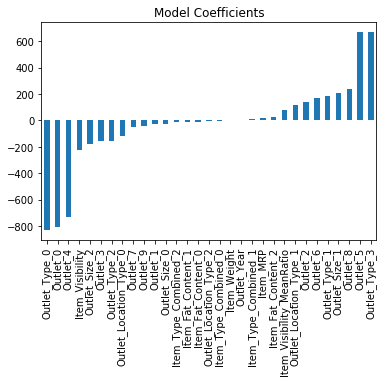

In [264]:
modelfit(alg1, train, test, predictors, target, IDcol, 'alg1.csv')
coef1= pd.Series(alg1.coef_, predictors).sort_values()
coef1.plot(kind='bar', title = 'Model Coefficients')